This notebook loads the VAEs trained by each method, and displays their optimization path. This reproduces figure 4 in our paper 

https://arxiv.org/pdf/1810.04777.pdf

To obtain the models displayed in this notebook, see the ../scripts/ folder, that contain the scripts used to generate these models. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

# REINFORCE

In [2]:
def get_test_losses(method, path = '../mnist_results_saved/', n_trials = 10): 
    trial_vec = [str(x) for x in range(1, n_trials + 1)]
    
    plt.plot()
    
    i = 0
    train_accuracy_vec = np.zeros(n_trials)
    test_accuracy_vec = np.zeros(n_trials)
    
    for trial in trial_vec:
        test_losses = np.load(path + 'ss_vae_' + method +'_trial' + trial + '_test_losses.npy')
        test_timing = np.load(path + 'ss_vae_' + method +'_trial' + trial + '_test_timing.npy')
        
        batch_timings = np.load(path + 'ss_vae_' + method +'_trial' +\
                                          trial + '_batch_timing.npy')
        if i == 0: 
            test_losses_array = np.zeros((n_trials, len(test_losses)))
            test_timing_array = np.zeros((n_trials, len(test_losses)))
            
            batch_timing_array = np.zeros((n_trials, len(batch_timings)))
        
        test_losses_array[i, :] = test_losses
        test_timing_array[i, :] = test_timing
        batch_timing_array[i, :] = batch_timings
        
        train_accuracy_vec[i] = np.load(path + 'ss_vae_'  + method +'_trial' +\
                                          trial + '_train_accuracy.npy')[-1]
        test_accuracy_vec[i] = np.load(path + 'ss_vae_'  + method +'_trial' +\
                                          trial + '_test_accuracy.npy')[-1]
        
        i += 1
        plt.plot(test_losses)
    
    n_trials = len(trial_vec)
    print('train accuracy: mean = {}, se = {}'.format(np.mean(train_accuracy_vec), 
                                                      np.std(train_accuracy_vec) / np.sqrt(n_trials)))
    print('test accuracy: mean = {}, se = {}'.format(np.mean(test_accuracy_vec), 
                                                     np.std(test_accuracy_vec) / np.sqrt(n_trials)))
    print('avg sec per epoch: mean = {}, sd = {}'.format(np.mean(batch_timing_array), np.std(batch_timing_array)))
    
    return test_losses_array, test_timing_array, test_accuracy_vec, train_accuracy_vec

train accuracy: mean = 0.9365666747093201, se = 0.0014996685695981716
test accuracy: mean = 0.9399299681186676, se = 0.001434577149337756
avg sec per epoch: mean = 15.730923329721582, sd = 1.593487115473329


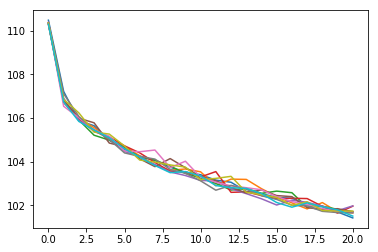

In [3]:
reinforce_test_losses_array, reinforce_test_timing_array, _, _ = \
    get_test_losses(method = 'reinforce')

# Fully marginalized

train accuracy: mean = 0.9685400128364563, se = 0.0008216547606985336
test accuracy: mean = 0.966299968957901, se = 0.0011669631571740438
avg sec per epoch: mean = 31.394758922982923, sd = 3.170136159890003


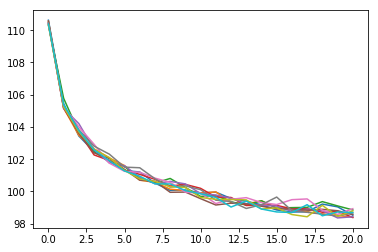

In [4]:
fully_marg_test_losses_array, fully_marg_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'fully_marg')

# Topk

train accuracy: mean = 0.9670711159706116, se = 0.0005415837312509004
test accuracy: mean = 0.9650299787521363, se = 0.0010896855051384
avg sec per epoch: mean = 17.450064977088775, sd = 1.7555304136617869


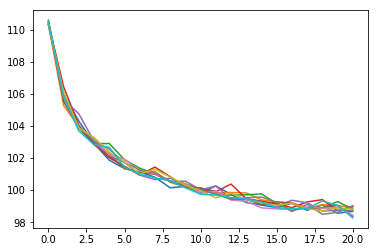

In [5]:
topk_test_losses_array, topk_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'reinforce_topk1', n_trials = 10)

In [6]:
# REINFORCE+

train accuracy: mean = 0.9531400144100189, se = 0.001571502391445731
test accuracy: mean = 0.953499972820282, se = 0.0014751252942338696
avg sec per epoch: mean = 17.24455981207366, sd = 1.7658053392570676


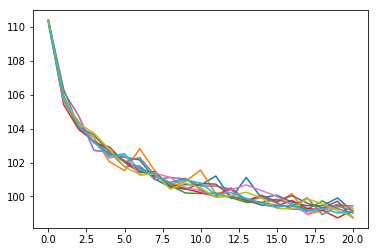

In [7]:
reinforce_p_test_losses_array, reinforce_p_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'reinforce_doublebs', path = '../mnist_vae_results/', n_trials = 10)

# NVIL

train accuracy: mean = 0.9571466684341431, se = 0.0018584171856579985
test accuracy: mean = 0.9562399685382843, se = 0.0018173140253032677
avg sec per epoch: mean = 17.479396397524543, sd = 1.8242871196843675


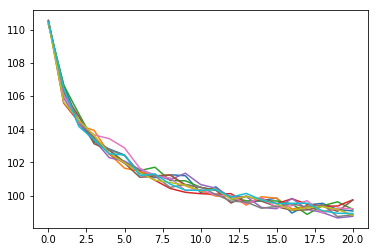

In [8]:
nvil_test_losses_array, nvil_test_timing_array, test_accuracy_vec, train_accuracy_vec = \
    get_test_losses(method = 'nvil', n_trials = 10)

# Gumbel Softmax

train accuracy: mean = 0.9555200159549713, se = 0.0011348967396517214
test accuracy: mean = 0.9545099675655365, se = 0.0012885979203536024
avg sec per epoch: mean = 16.389506184464633, sd = 1.7011779434619418


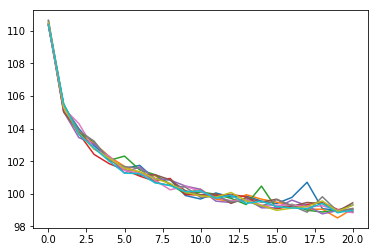

In [9]:
gumbel_test_losses_array, gumbel_test_timing_array, _, _ = \
    get_test_losses(method = 'gumbel', n_trials = 10)

# REBAR

train accuracy: mean = 0.9371066808700561, se = 0.0026201870825474398
test accuracy: mean = 0.93744997382164, se = 0.0027181709313600375
avg sec per epoch: mean = 19.102552245867134, sd = 1.9275717921788067


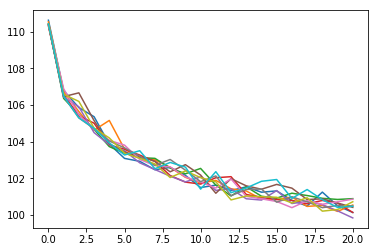

In [10]:
rebar_test_losses_array, rebar_test_timing_array, _, _ = \
    get_test_losses(method = 'rebar')

train accuracy: mean = 0.9271089017391205, se = 0.005291429566132641
test accuracy: mean = 0.9291499793529511, se = 0.005284963664821607
avg sec per epoch: mean = 19.735073183078576, sd = 2.0041790619509716


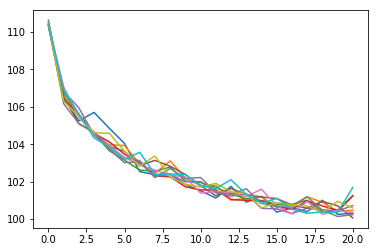

In [11]:
rebar_test_losses_array, rebar_test_timing_array, _, _ = \
    get_test_losses(method = 'rebar', path='../mnist_vae_results2/', n_trials=10)

In [12]:
rebar_test_losses_array.shape

(10, 21)

In [13]:
topk_test_losses_array.shape

(10, 21)

Text(0, 0.5, 'Negative ELBO')

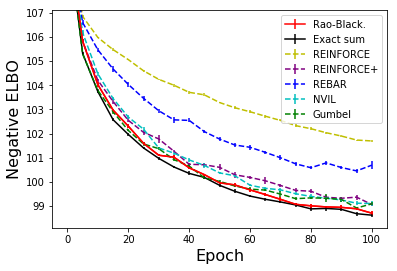

In [14]:
plt.errorbar(np.arange(21) * 5, 
            np.mean(topk_test_losses_array, axis = 0), 
            yerr= np.std(topk_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Rao-Black.', 
            color = 'r')

plt.errorbar(np.arange(21) * 5, 
            np.mean(fully_marg_test_losses_array, axis = 0), 
            yerr= np.std(fully_marg_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Exact sum', 
            color = 'k', 
            linestyle = '-')

plt.errorbar(np.arange(21) * 5, 
            np.mean(reinforce_test_losses_array, axis = 0), 
            yerr= np.std(reinforce_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'REINFORCE', 
            color = 'y', 
            linestyle = '--')

plt.errorbar(np.arange(21) * 5, 
            np.mean(reinforce_p_test_losses_array, axis = 0), 
            yerr= np.std(reinforce_p_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'REINFORCE+', 
            color = 'purple',
            linestyle = '--')

plt.errorbar(np.arange(21) * 5, 
            np.mean(rebar_test_losses_array, axis = 0), 
            yerr= np.std(rebar_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'REBAR', 
            color = 'b', 
            linestyle = '--')
# plt.plot(np.arange(18) * 5, rebar_test_losses_array.squeeze())

plt.errorbar(np.arange(21) * 5, 
            np.mean(nvil_test_losses_array, axis = 0), 
            yerr= np.std(nvil_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'NVIL', 
            color = 'c', 
            linestyle = '--')

plt.errorbar(np.arange(21) * 5, 
            np.mean(gumbel_test_losses_array, axis = 0), 
            yerr= np.std(gumbel_test_losses_array, axis = 0) / np.sqrt(10), 
            label = 'Gumbel', 
            color = 'g', 
            linestyle = '--')

plt.errorbar(np.arange(21) * 5, 
            np.mean(topk_test_losses_array, axis = 0), 
            yerr= np.std(topk_test_losses_array, axis = 0) / np.sqrt(10), 
            color = 'r')

plt.legend()

plt.ylim((98.1, 107.1))

from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) #  decimal places


plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Negative ELBO', fontsize = 16)

In [15]:
np.mean(rebar_test_losses_array, axis = 0)

array([110.43122101, 106.59604492, 105.46643219, 104.67321701,
       104.03449631, 103.46075211, 102.94634628, 102.56807251,
       102.54589081, 102.08083878, 101.77325058, 101.52714233,
       101.43255005, 101.22432861, 100.99917068, 100.74668579,
       100.58656921, 100.78704453, 100.59465714, 100.455439  ,
       100.69265213])

In [16]:
np.load('../mnist_results_saved/ss_vae_rebar_trial10_batch_losses.npy')

array([111.48164 , 109.569954, 108.54881 , 108.02814 , 107.64711 ,
       107.24837 , 106.934265, 106.52906 , 106.30777 , 106.19531 ,
       105.77734 , 105.48005 , 105.39625 , 105.47954 , 104.94592 ,
       104.68357 , 104.628716, 104.492134, 104.32017 , 103.99509 ,
       104.1219  , 103.949455, 103.81818 , 103.604065, 103.51839 ,
       103.59328 , 103.16225 , 103.428856, 103.32358 , 103.204765,
       102.78662 , 102.821144, 102.75098 , 102.8832  , 102.72686 ,
       102.44242 , 102.48117 , 102.24102 , 102.31662 , 102.40881 ,
       102.58629 , 101.943756, 101.89649 , 102.2809  , 101.75647 ,
       101.90099 , 101.70904 , 101.8029  , 101.643875, 101.56114 ,
       101.264366, 101.46991 , 101.635056, 101.13812 , 101.409966,
       101.608665, 101.313225, 101.307724, 101.15397 , 101.083145,
       101.03008 , 100.865425, 100.98368 , 100.88028 , 101.28797 ,
       100.92876 , 100.85949 , 100.625   , 100.90933 , 100.73091 ,
       100.64201 , 100.77459 , 100.44994 , 100.41152 , 100.411

In [17]:
np.load('../mnist_results_saved/ss_vae_nvil_trial10_batch_losses.npy')

array([111.5501  , 110.025055, 108.423965, 107.64971 , 106.8403  ,
       106.4125  , 106.19212 , 105.286354, 105.11911 , 104.701004,
       104.36259 , 104.07157 , 103.58148 , 103.39664 , 103.15304 ,
       102.95137 , 102.73712 , 102.73279 , 102.393524, 102.30828 ,
       101.93968 , 101.9856  , 101.77049 , 101.724075, 101.465256,
       101.35754 , 101.32552 , 101.13748 , 100.915344, 100.91299 ,
       100.7219  , 100.627625, 100.768875, 100.56593 , 100.42287 ,
       100.51906 , 100.37688 , 100.30334 , 100.033936, 100.0198  ,
        99.96991 ,  99.83675 ,  99.90765 ,  99.81581 ,  99.66771 ,
        99.63368 ,  99.608055,  99.52683 ,  99.42817 ,  99.438   ,
        99.44749 ,  99.238655,  99.29048 ,  99.26558 ,  99.075226,
        99.04781 ,  99.14131 ,  99.043816,  99.01661 ,  98.816765,
        99.02403 ,  99.01465 ,  98.77174 ,  98.79126 ,  98.78913 ,
        98.588135,  98.567   ,  98.6894  ,  98.65414 ,  98.521   ,
        98.557724,  98.48227 ,  98.51446 ,  98.362   ,  98.538